# Load Forecasting using Simple Linear Regression


In [ ]:
#Import Library
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math
import sklearn.preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from google.colab import files

In [ ]:
# Input dataset
df = pd.read_excel('PJME_hourly_List_nomor.xlsx')
df

,Datetime,PJME_MW
0,1,26498
1,2,25147
2,3,24574
3,4,24393
4,5,24860
...,...,...
145361,145362,44284
145362,145363,43751
145363,145364,42402
145364,145365,40164


In [ ]:
#Informasi data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145366 entries, 0 to 145365
Data columns (total 2 columns):
 #   Column    Non-Null Count   Dtype
---  ------    --------------   -----
 0   Datetime  145366 non-null  int64
 1   PJME_MW   145366 non-null  int64
dtypes: int64(2)
memory usage: 2.2 MB


In [ ]:
#Menentukan data X
X = df['Datetime']
X.head()

0    1
1    2
2    3
3    4
4    5
Name: Datetime, dtype: int64

In [ ]:
#Menentukan data y
y = df['PJME_MW']
y.head()

0    26498
1    25147
2    24574
3    24393
4    24860
Name: PJME_MW, dtype: int64

In [ ]:
# Split the data for train and test 
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.216105,random_state=100)

In [ ]:
# Create new axis for x column
X_train = X_train[:,np.newaxis]
X_test = X_test[:,np.newaxis]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
# Fitting model
lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
#Menentukan nilai prediksi
y_pred = lr.predict(X_test)

df2 = pd.DataFrame(y_pred, columns = ['Hasil Prediksi'])
df2.to_excel('Prediksi_Simple_Linear_Regression.xlsx')
df2

,Hasil Prediksi
0,31652.877490
1,32547.264810
2,32422.394026
3,32565.227928
4,32535.061266
...,...
31410,31545.427643
31411,32123.678297
31412,32236.976601
31413,31925.132951


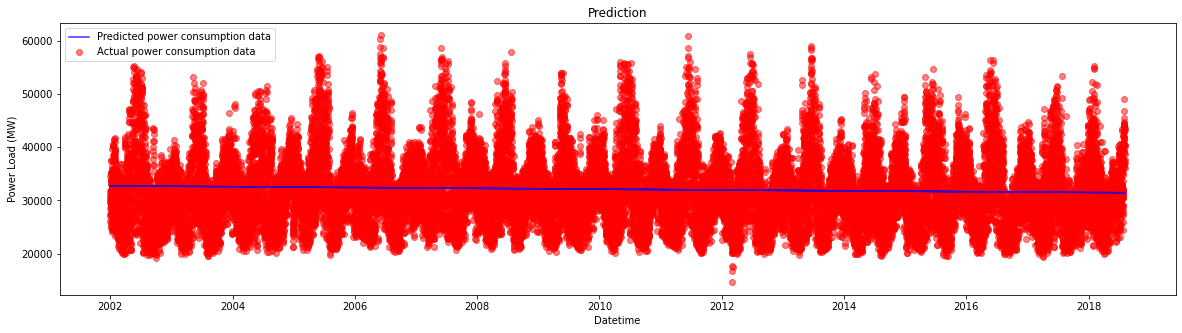

In [ ]:
#Plot hasil prediksi data keseluruhan
plt.figure(figsize=(20,5))
plt.scatter(X_test,y_test, color= 'red', alpha=0.5, label='Actual power consumption data')
plt.plot(X_test,y_pred, color = 'blue', alpha=0.8, label='Predicted power consumption data')
x_ticks = np.arange(0, 145346, 17520)
plt.xticks(range(0, 145346, 17520), ['2002', '2004', '2006', '2008', '2010', '2012', '2014', '2016', '2018'])
plt.xticks(x_ticks)
plt.xlabel('Datetime')
plt.ylabel('Power Load (MW)')
plt.title('Prediction')
plt.legend()
plt.show()

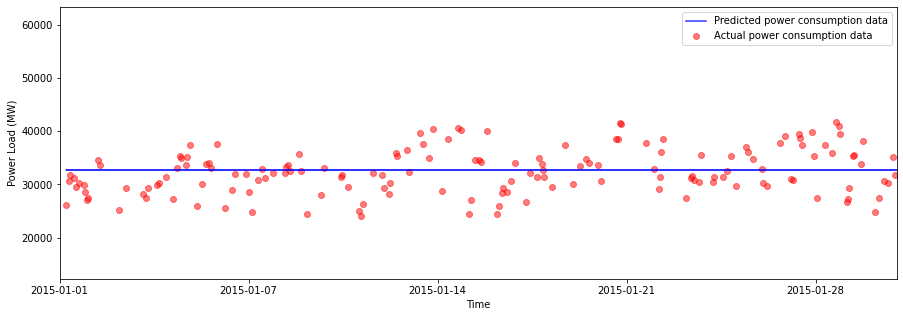

In [ ]:
#Plot hasil prediksi data bulan Januari 2015
plt.figure(figsize=(15,5))
plt.scatter(X_test,y_test, color= 'red', alpha=0.5, label='Actual power consumption data')
plt.plot(X_test,y_pred, color = 'blue', alpha=0.8, label='Predicted power consumption data')
plt.xlim([0,744])
x_ticks = np.arange(0, 750, 168)
plt.xticks(range(0, 750, 168), ['2015-01-01', '2015-01-07', '2015-01-14', '2015-01-21', '2015-01-28'])
plt.xticks(x_ticks)
plt.xlabel('Time')
plt.ylabel('Power Load (MW)')
plt.legend()
plt.show()

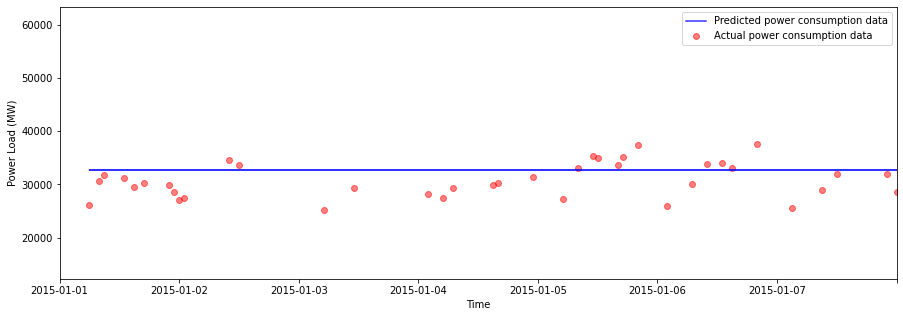

In [ ]:
#Plot hasil prediksi data minggu pertama bulan Januari 2015
plt.figure(figsize=(15,5))
plt.scatter(X_test,y_test, color= 'red', alpha=0.5, label='Actual power consumption data')
plt.plot(X_test,y_pred, color = 'blue', alpha=0.8, label='Predicted power consumption data')
plt.xlim([0,168])
x_ticks = np.arange(0, 169, 24)
plt.xticks(range(0, 169, 24), ['2015-01-01', '2015-01-02', '2015-01-03', '2015-01-04', '2015-01-05', '2015-01-06', '2015-01-07', ''])
plt.xticks(x_ticks)
plt.xlabel('Time')
plt.ylabel('Power Load (MW)')
plt.legend()
plt.show()

In [ ]:
# Intecept dan koefisien garis
print('Intercept of the model:',lr.intercept_)
print('Coefficient of the line:',lr.coef_)

Intercept of the model: 32733.11664991382
Coefficient of the line: [-0.00888879]


**y = 32731.89 - 0.0088x**

In [ ]:
#Menentukan nilai MAPE
def mean_absolute_percentage_error(y_true, y_pred): 
    """Calculates MAPE given y_true and y_pred"""
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

mean_absolute_percentage_error(y_true=y_test,
                   y_pred=y_pred.transpose())

16.04716380156521